In [20]:
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [21]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Force TensorFlow to use CPU

In [22]:
# Load MNIST dataset

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
indices = np.random.permutation(len(X_train)) 
X_train, y_train = X_train[indices], y_train[indices]


X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (60000, 28, 28, 1), y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1), y_test shape: (10000, 10)


In [23]:
# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),  # First conv layer
    MaxPooling2D(pool_size=(2,2)),  # Downsampling
    
    Conv2D(64, kernel_size=(3,3), activation='relu'),  # Second conv layer
    MaxPooling2D(pool_size=(2,2)),  
    
    Flatten(),  # Flatten to connect with Dense layer
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout for regularization
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

/home/faizankhan/miniconda3/envs/myenv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8673 - loss: 0.4243 - val_accuracy: 0.9855 - val_loss: 0.0442
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9754 - loss: 0.0839 - val_accuracy: 0.9860 - val_loss: 0.0411
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9834 - loss: 0.0577 - val_accuracy: 0.9895 - val_loss: 0.0306
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9852 - loss: 0.0489 - val_accuracy: 0.9902 - val_loss: 0.0300
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9888 - loss: 0.0363 - val_accuracy: 0.9911 - val_loss: 0.0296
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9897 - loss: 0.0338 - val_accuracy: 0.9911 - val_loss: 0.0278
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9923 - loss: 0.0282 - val_accuracy: 0.9917 - val_loss: 0.0285
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9917 -

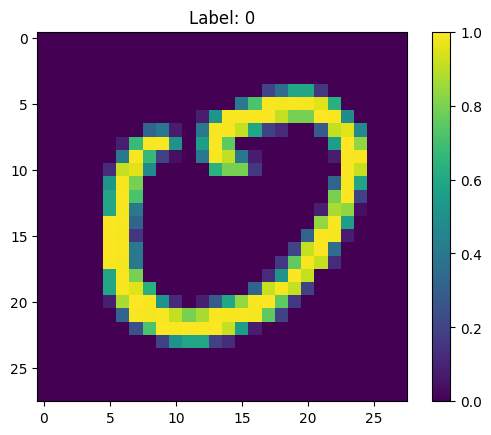

In [25]:
plt.imshow(X_train[500])  
plt.title(f"Label: {np.argmax(y_train[500])}") 
plt.colorbar()                       
plt.show()                           


In [26]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9985 - loss: 0.0045 - val_accuracy: 0.9996 - val_loss: 0.0014
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9981 - loss: 0.0063 - val_accuracy: 0.9998 - val_loss: 7.9560e-04
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9987 - loss: 0.0054 - val_accuracy: 0.9999 - val_loss: 4.2863e-04
Epoch 4/100
1016/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9987 - loss: 0.0064

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9988 - loss: 0.0057 - val_accuracy: 0.9995 - val_loss: 0.0018
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9979 - loss: 0.0087 - val_accuracy: 0.9998 - val_loss: 4.4093e-04
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9988 - loss: 0.0044 - val_accuracy: 0.9996 - val_loss: 0.0015
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9979 - loss: 0.0063 - val_accuracy: 0.9994 - val_loss: 0.0022
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9985 - loss: 0.0052 - val_accuracy: 0.9999 - val_loss: 3.1735e-04
Epoch 9/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9983 - loss: 0.0060 - val_accuracy: 0.9998 - val_loss: 0.0010
Epoch 10/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9980 - loss: 0.0074 - val_accuracy: 0.9997 - val_loss: 0.0011
Epoch 11/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9987 - l

In [27]:
# Alternative Prediction Method (Efficient)
y_pred = model.predict(X_test, batch_size=32).argmax(axis=1)




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [28]:


# Accuracy Calculation
y_test_labels = np.argmax(y_test, axis=1)
acc = accuracy_score(y_test_labels, y_pred)
print(f"Test Accuracy: {acc:.4f}")


Test Accuracy: 0.9924


In [29]:


y_test_labels = np.argmax(y_test, axis=1)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



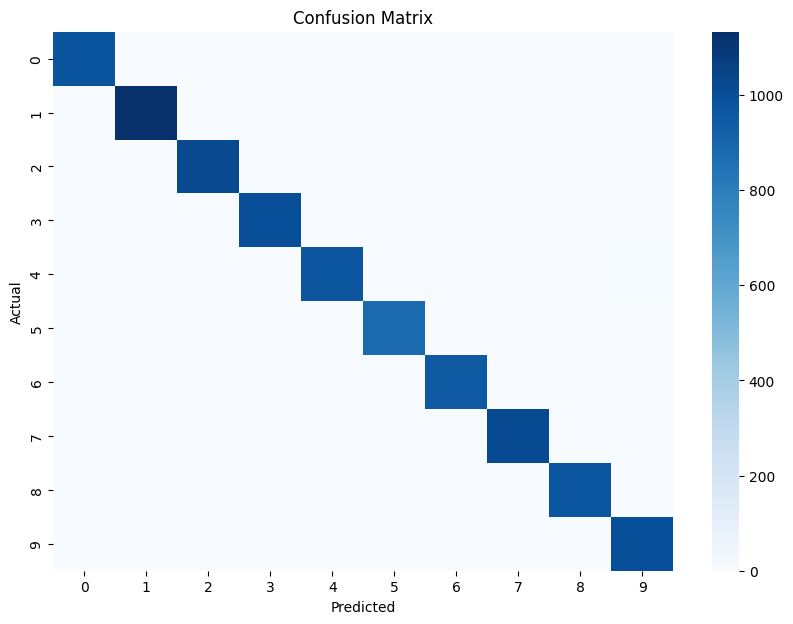

In [30]:


# Ensure that y_test is in the correct format (if one-hot encoded, convert to label indices)
y_test_labels = np.argmax(y_test, axis=1)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test_labels, y_pred), annot=False, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

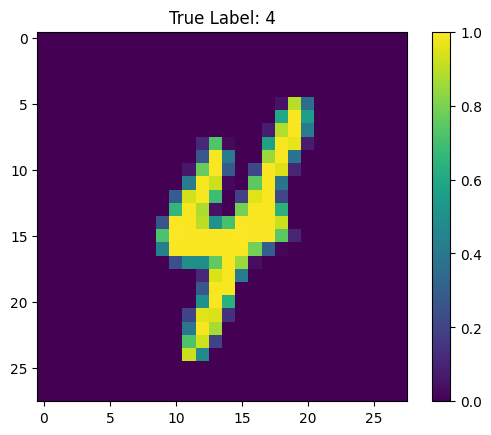

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted label: 4


In [31]:
arr = int(input("Enter a test index (0 to 9999): "))

plt.imshow(X_test[arr].reshape(28, 28))
plt.title(f"True Label: {np.argmax(y_test[arr])}")  # If y_test is one-hot
plt.colorbar()
plt.show()

prediction = model.predict(X_test[arr].reshape(1, 28, 28, 1))
predicted_label = prediction.argmax(axis=1)[0]
print(f"Predicted label: {predicted_label}")


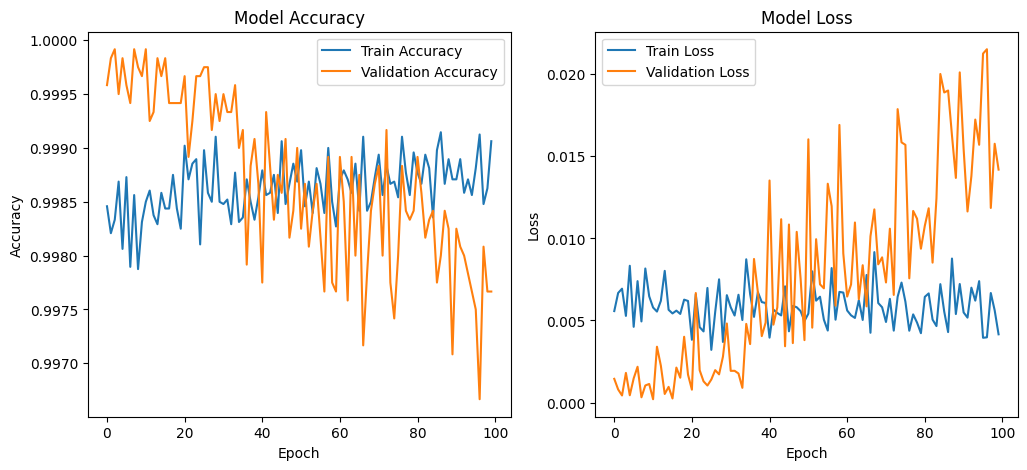

In [33]:
# Plot Training History (Accuracy & Loss)
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
